In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Step 1: Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

print(X.shape)
print(y.shape)
print(X[1])
print(y[1])

print(len(X))



(70000, 784)
(70000,)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.

In [13]:
# Step 2: Normalize the data
X /= 255.0  # Scale pixel values to [0, 1]
print(X[1])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
# Step 3: Compute the covariance matrix
mean_vec = np.mean(X, axis=0)
cov_matrix = np.cov(X - mean_vec, rowvar=False)
print(len(cov_matrix))


784


(784, 784)


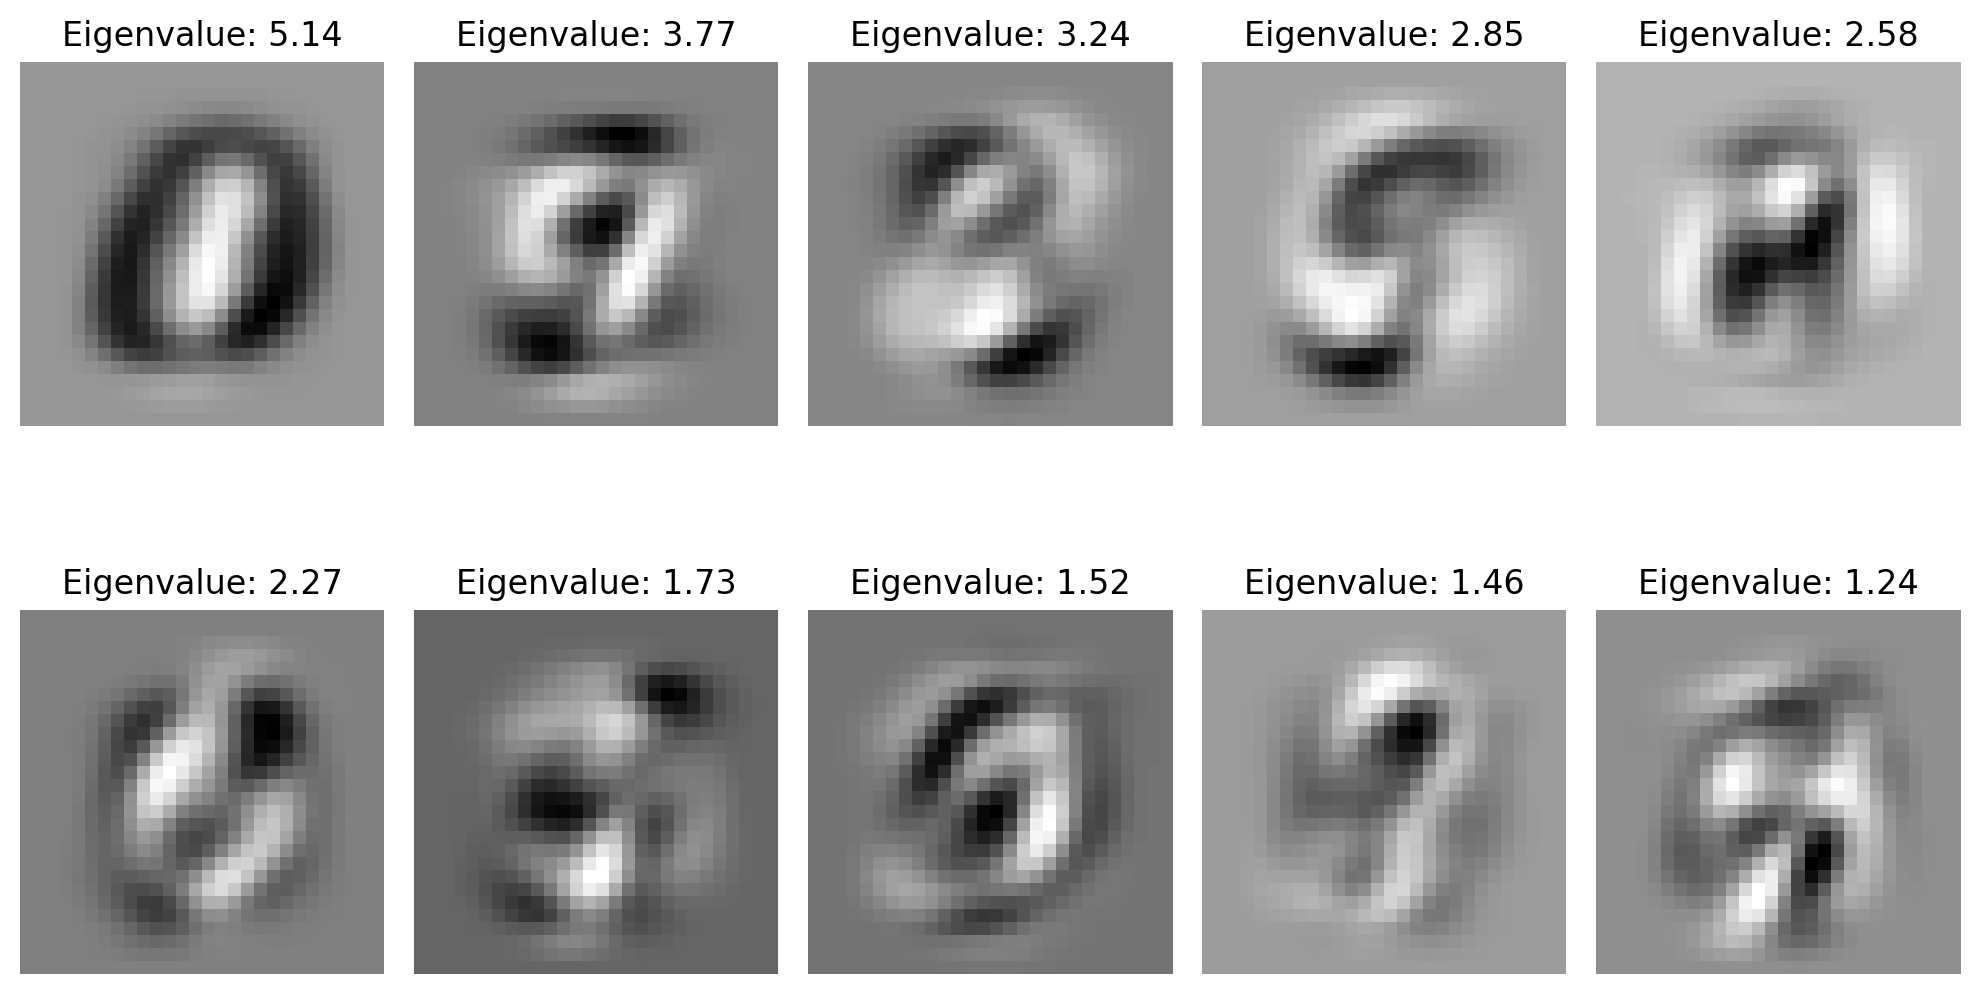

In [15]:
# Ensure real eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues = eigenvalues[::-1]  # Reverse order (since eigh() sorts ascending)
eigenvectors = eigenvectors[:, ::-1]
#print(eigenvalues)
print(eigenvectors.shape)
# Visualizing the top 10 principal components
plt.figure(figsize=(10, 5),  dpi=200)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    eigenvector_img = eigenvectors[:, i].reshape(28, 28)
    # Normalize for better contrast
    eigenvector_img = (eigenvector_img - np.min(eigenvector_img)) / (np.max(eigenvector_img) - np.min(eigenvector_img))

    plt.imshow(eigenvector_img, cmap='gray')
    plt.title(f"Eigenvalue: {eigenvalues[i]:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust spacing
plt.show()







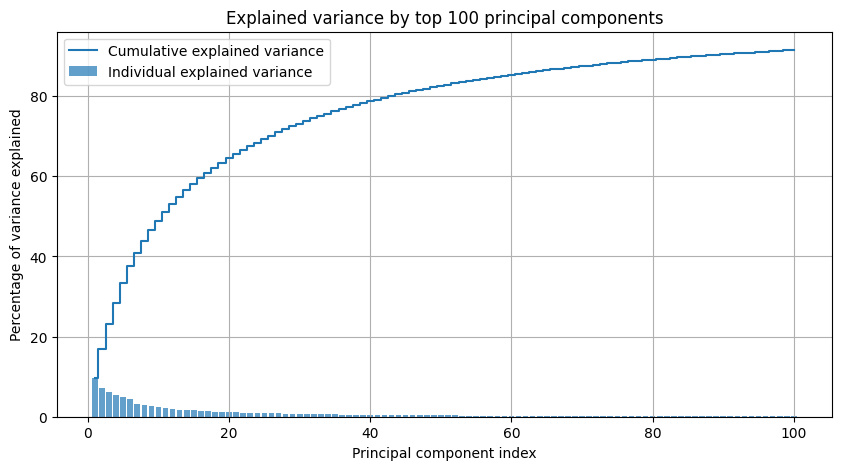

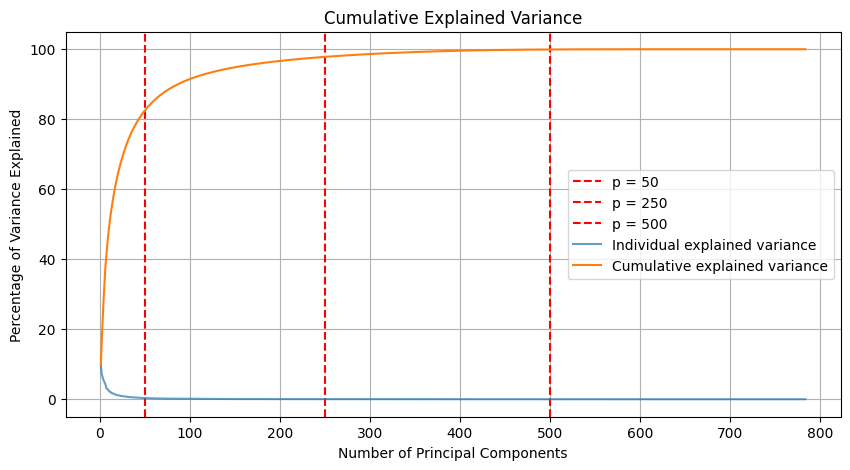

In [16]:

# Calculate explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
#print(explained_variance)
#print(cumulative_explained_variance)
# Plot explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, 101), explained_variance[:100] * 100, alpha=0.7, label='Individual explained variance')
plt.step(range(1, 101), cumulative_explained_variance[:100] * 100, where='mid', label='Cumulative explained variance')

plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained variance by top 100 principal components')
plt.grid(True)
plt.show()
# Reduce dimensions for p = 50, 250, 500
p_values = [50, 250, 500]
plt.figure(figsize=(10, 5))
for p in p_values:
    plt.axvline(p, color='r', linestyle='--', label=f'p = {p}')
    # Bar plot for individual explained variance (same as first plot)
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7, label='Individual explained variance')

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance * 100, label='Cumulative explained variance')


plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Variance Explained')
plt.legend()
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

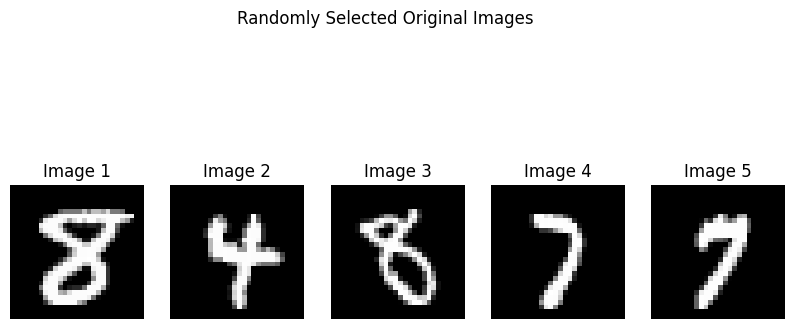

In [17]:
# Define p values
p_values = [50, 250, 500]
# Select 5 random sample images and visualize them
np.random.seed(42)
sample_indices = np.random.choice(X.shape[0], 5, replace=False)
sample_images = X[sample_indices]

# Plot original images
plt.figure(figsize=(10, 5))
for i, img in enumerate(sample_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.suptitle('Randomly Selected Original Images')
plt.show()



# Calculate PSNR for each p and visualize reconstructions
#psnr_results = {}
#plt.figure(figsize=(15, 10))

In [18]:
def pca_transform(X, eigenvectors, p, mean_vec):
    mean_vec = mean_vec.reshape(1, -1)
    top_p_eigenvectors = eigenvectors[:, :p]
    return top_p_eigenvectors, np.dot(X - mean_vec, top_p_eigenvectors)


# PSNR calculation
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0  # Since images are normalized to [0, 1]
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


def pca_reconstruct(Z, W, mean_vec):
    # Ensure mean_vec is broadcastable (reshape to (5, 784))
    #print(mean_vec.shape)
    mean_vec = mean_vec.reshape(1, -1)
    print(Z.shape)
    print(W.shape)
    print(mean_vec.shape)
    # Back-project to original space: Z (5, p) * W.T (p, 784) -> (5, 784)
    X_reconstructed = np.dot(Z, W.T) + mean_vec

    # Ensure the mean vector is added to all images (5 rows)
    return np.clip(X_reconstructed, 0, 1)




(5, 50)
(784, 50)
(1, 784)

p = 50, W shape: (784, 50), Z shape: (5, 50)
Original sample mean: 0.14598238468170166, Reconstructed mean: 0.15303440964997675
50
[19.35732263138655, 20.553785588310088, 16.6251526607507, 22.518934680268757, 22.54552231438574]
(5, 250)
(784, 250)
(1, 784)

p = 250, W shape: (784, 250), Z shape: (5, 250)
Original sample mean: 0.14598238468170166, Reconstructed mean: 0.15011731464837683
250
[26.86595429805483, 30.511180963912963, 28.22162280696517, 33.390530469365395, 32.266575891531176]
(5, 500)
(784, 500)
(1, 784)

p = 500, W shape: (784, 500), Z shape: (5, 500)
Original sample mean: 0.14598238468170166, Reconstructed mean: 0.14637889489095085
500
[39.08593101428692, 61.841866010136016, 53.42642211198333, 66.34713102922254, 68.98199915847785]


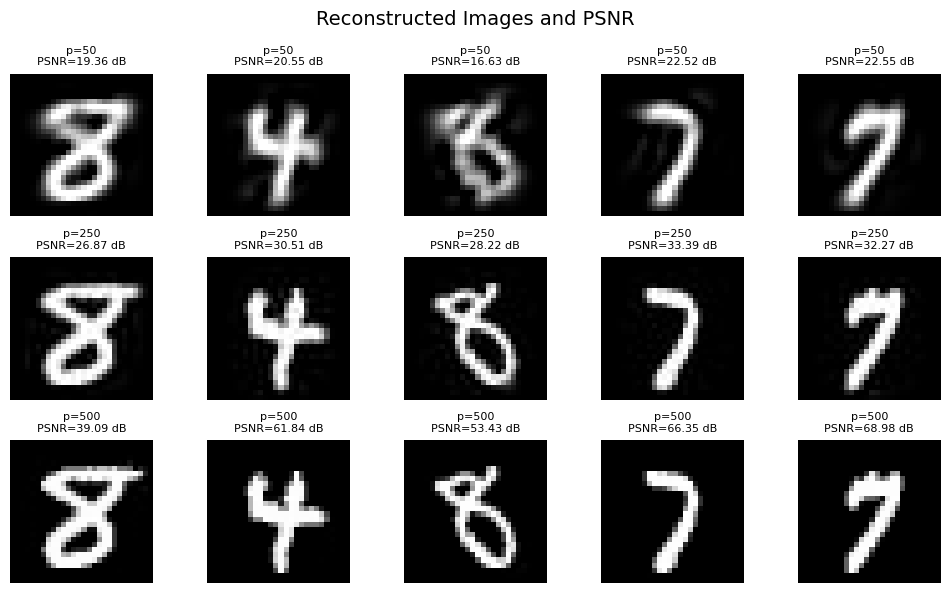

PSNR values for p = 50:
  Image 1: 19.36 dB
  Image 2: 20.55 dB
  Image 3: 16.63 dB
  Image 4: 22.52 dB
  Image 5: 22.55 dB

PSNR values for p = 250:
  Image 1: 26.87 dB
  Image 2: 30.51 dB
  Image 3: 28.22 dB
  Image 4: 33.39 dB
  Image 5: 32.27 dB

PSNR values for p = 500:
  Image 1: 39.09 dB
  Image 2: 61.84 dB
  Image 3: 53.43 dB
  Image 4: 66.35 dB
  Image 5: 68.98 dB



In [19]:
fig, axes = plt.subplots(len(p_values), 5, figsize=(10, len(p_values) * 2))
psnr_results = {}
# Ensure axes is always 2D
axes = np.atleast_2d(axes)

# Store all reconstructions
all_reconstructed_images = {}

for i, p in enumerate(p_values):
    W, Z = pca_transform(sample_images, eigenvectors, p, mean_vec)
    reconstructed_images = pca_reconstruct(Z, W, mean_vec)
    reconstructed_images = np.real(reconstructed_images)
    all_reconstructed_images[p] = reconstructed_images  # Store each set separately
    print(f"\np = {p}, W shape: {W.shape}, Z shape: {Z.shape}")
    print(f"Original sample mean: {np.mean(sample_images)}, Reconstructed mean: {np.mean(reconstructed_images)}")

    if np.allclose(sample_images, reconstructed_images):
        print("⚠️ Warning: Reconstructed images are too close to the originals!")

    # Compute PSNR for each image
    psnr_values = [calculate_psnr(sample_images[j], reconstructed_images[j]) for j in range(5)]
    psnr_results[p] = psnr_values
    print(p)
    print(psnr_values)




# Plot images
for i, p in enumerate(p_values):
    for j, img in enumerate(all_reconstructed_images[p][:5]):  # Use stored images
        axes[i, j].imshow(img.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'p={p}\nPSNR={psnr_results[p][j]:.2f} dB', fontsize=8)
        axes[i, j].axis('off')

plt.suptitle('Reconstructed Images and PSNR', fontsize=14)
plt.tight_layout()
plt.show()



# Display PSNR results
for p, psnrs in psnr_results.items():
    print(f"PSNR values for p = {p}:")
    for i, psnr in enumerate(psnrs):
        print(f"  Image {i + 1}: {psnr:.2f} dB")
    print()


